In [1]:
# a
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from unsupervised_jim import KMeans,KMedoids

X, y = make_blobs(
        n_samples=500,
        n_features=2,
        centers=4,
        cluster_std=1,
        center_box=(-10.0, 10.0),
        shuffle=True,
        random_state=1,
        )

For n_clusters = 2 The average Kmaeans silhouette_score is : 0.7049787496083262
For n_clusters = 2 The average KMedoids silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average Kmaeans silhouette_score is : 0.5882004012129721
For n_clusters = 3 The average KMedoids silhouette_score is : 0.5873430979447513
For n_clusters = 4 The average Kmaeans silhouette_score is : 0.5484850579660973
For n_clusters = 4 The average KMedoids silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average Kmaeans silhouette_score is : 0.555806786741096
For n_clusters = 5 The average KMedoids silhouette_score is : 0.5447687947976159
For n_clusters = 6 The average Kmaeans silhouette_score is : 0.5286203619438088
For n_clusters = 6 The average KMedoids silhouette_score is : 0.43598791537827897


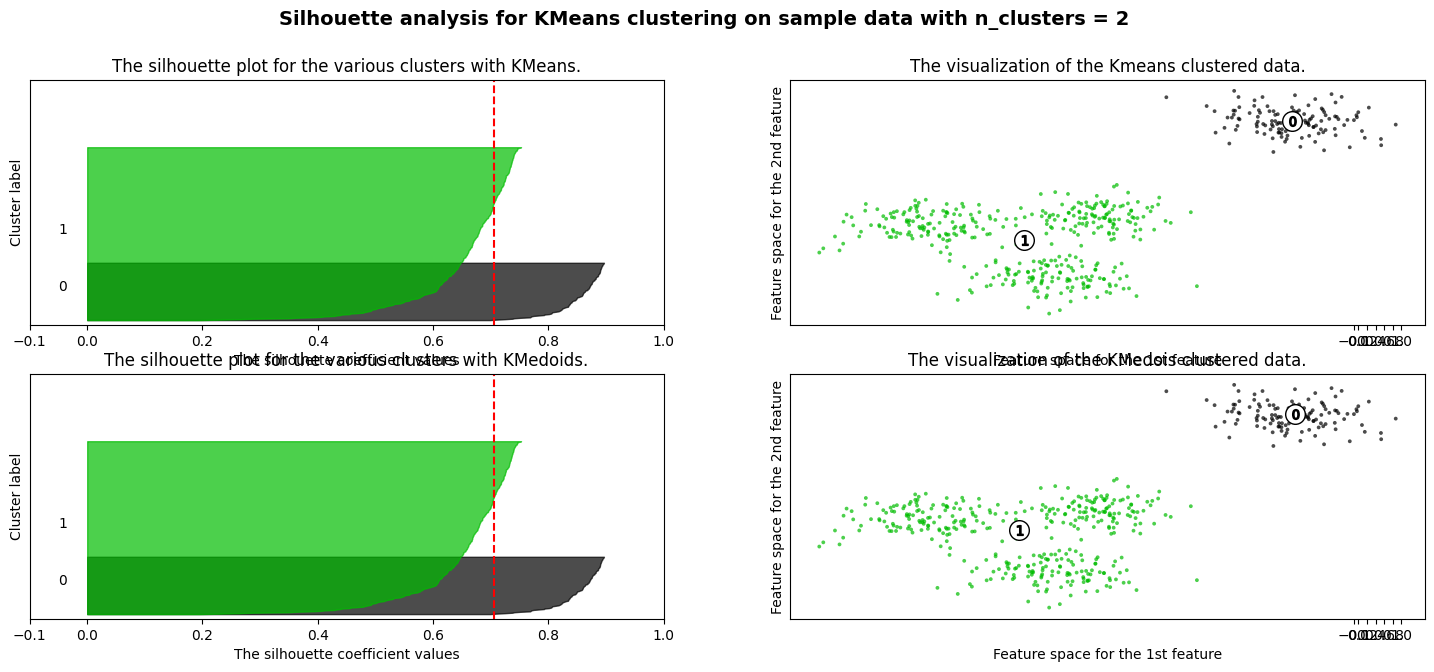

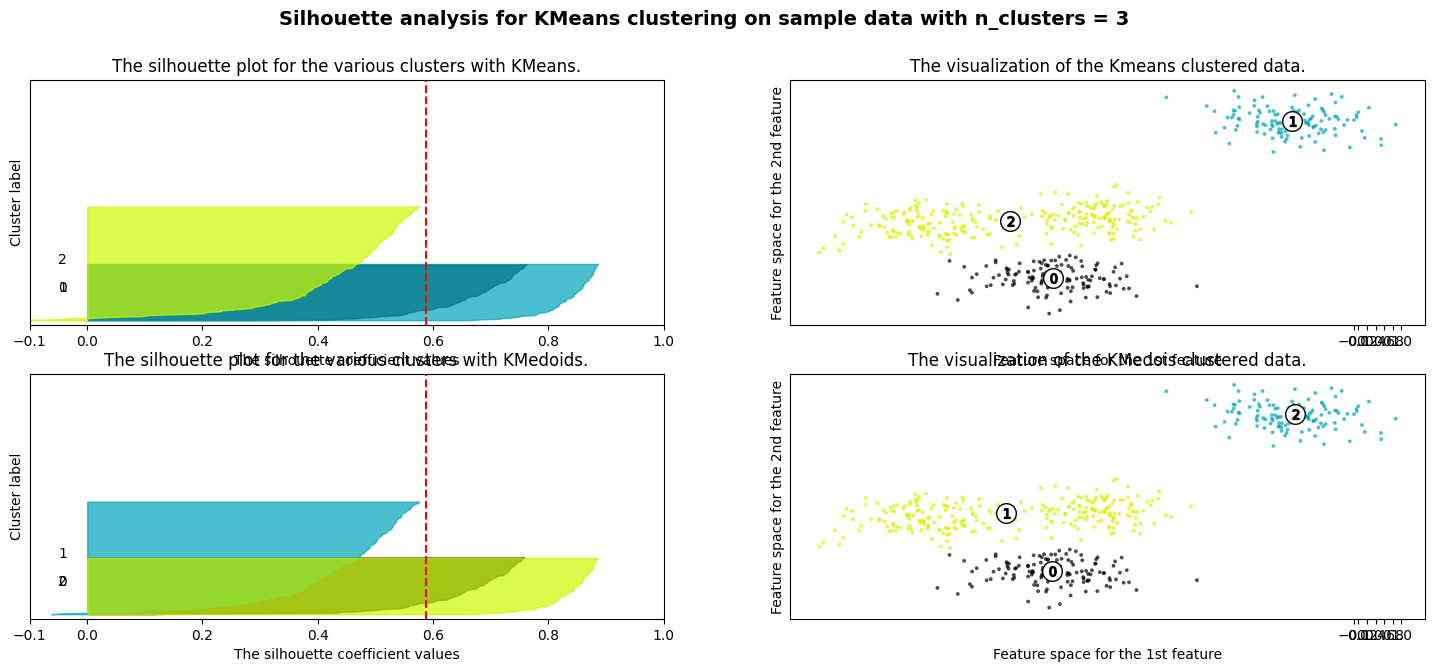

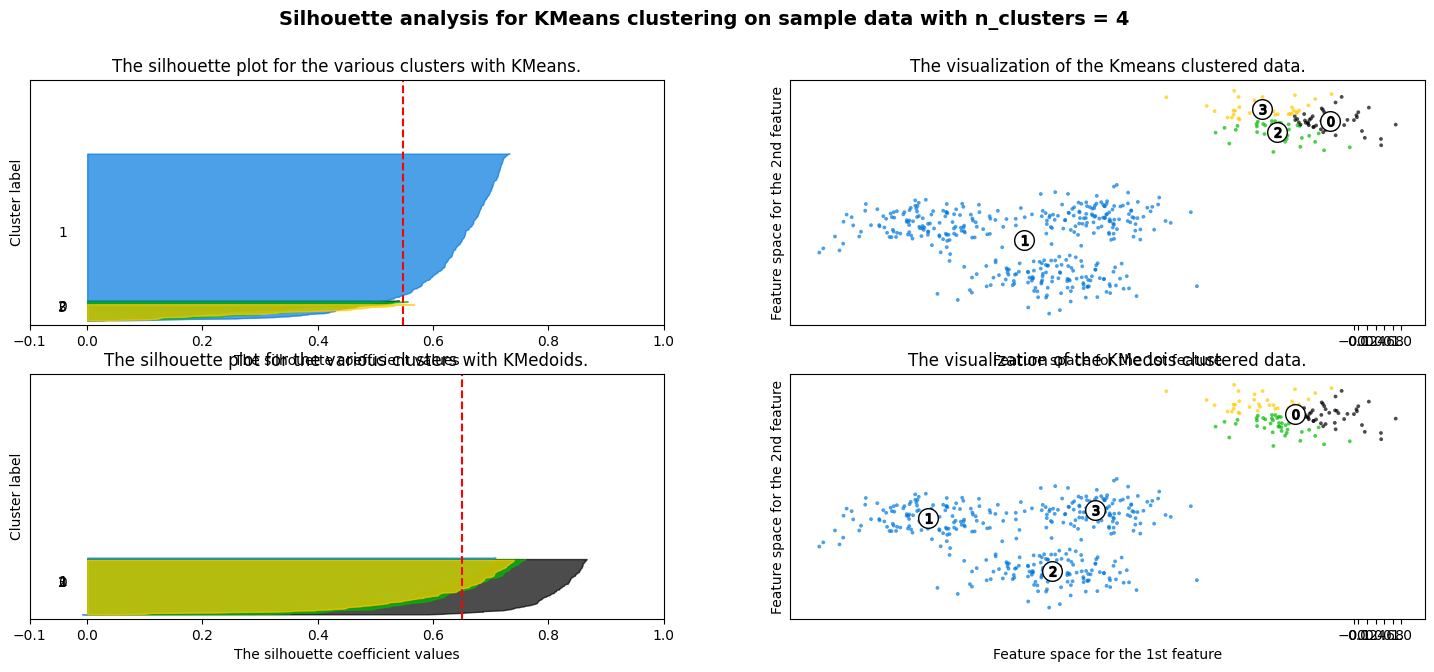

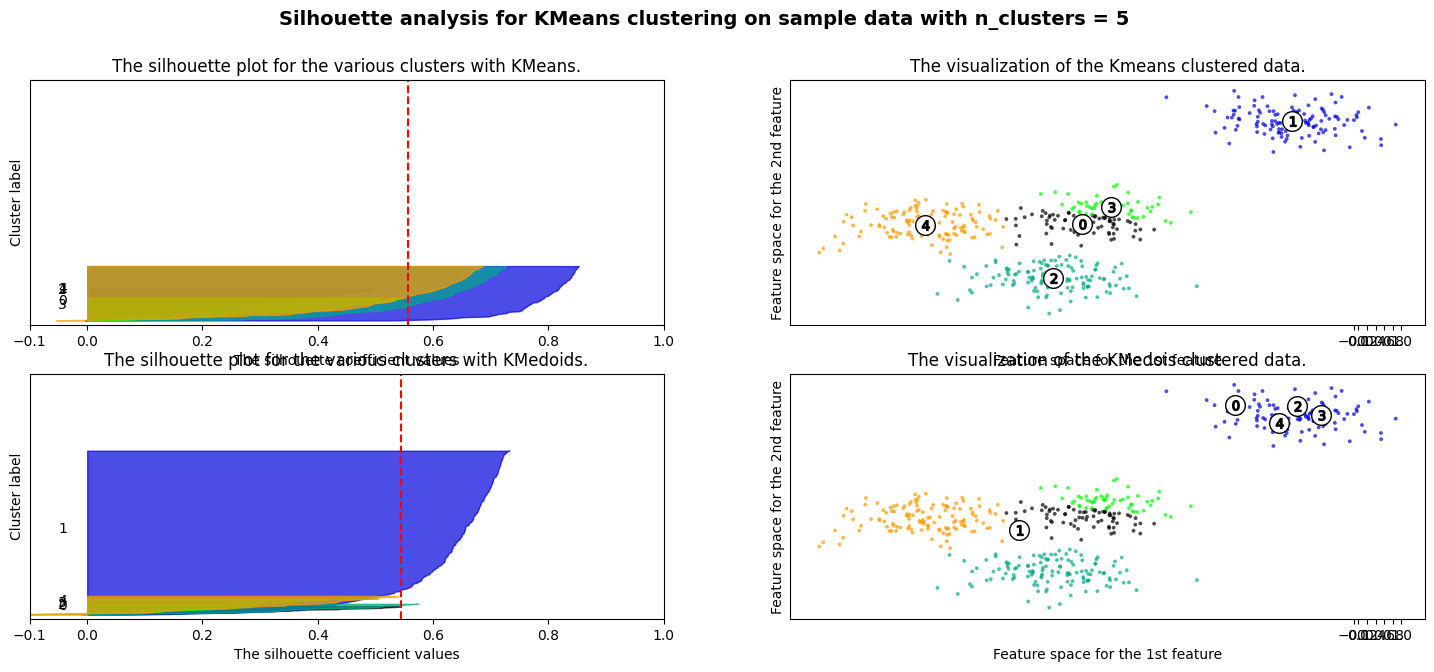

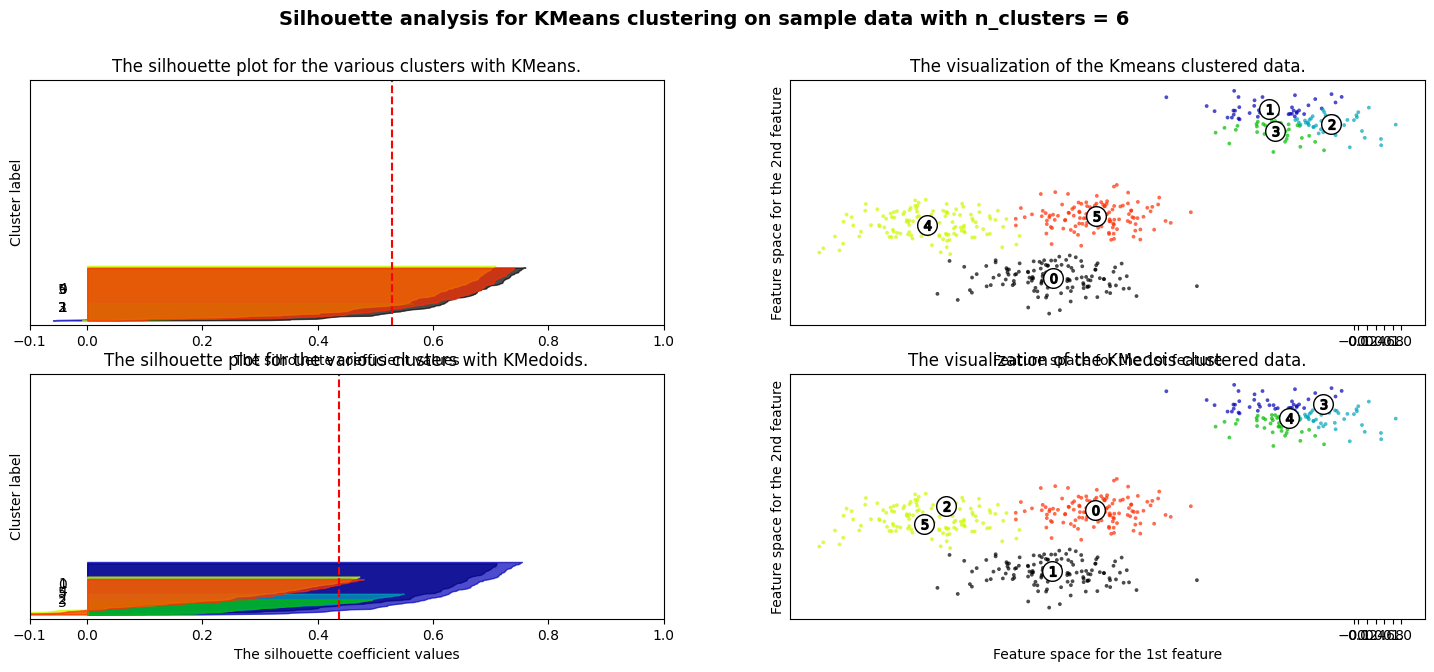

In [5]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    ax3.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    ax3.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer_kmeans_kmeans with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer_kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels_kmeans = clusterer_kmeans.fit_predict(X)
    clusterer_kmedoids = KMedoids(n_clusters=n_clusters, distance_func='euclidean')
    cluster_labels_kmedoids = clusterer_kmedoids.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg_kmeans = silhouette_score(X, cluster_labels_kmeans)
    print(
        "For n_clusters =",
        n_clusters,
        "The average Kmaeans silhouette_score is :",
        silhouette_avg_kmeans,
    )

    silhouette_avg_kmedoids = silhouette_score(X, cluster_labels_kmedoids)
    print(
        "For n_clusters =",
        n_clusters,
        "The average KMedoids silhouette_score is :",
        silhouette_avg_kmedoids,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values_kmeans = silhouette_samples(X, cluster_labels_kmeans)
    sample_silhouette_values_kmedoids = silhouette_samples(X, cluster_labels_kmedoids)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values_kmeans = sample_silhouette_values_kmeans[cluster_labels_kmeans == i]
        ith_cluster_silhouette_values_kmdoids = sample_silhouette_values_kmedoids[cluster_labels_kmedoids == i]

        ith_cluster_silhouette_values_kmeans.sort()
        ith_cluster_silhouette_values_kmdoids.sort()

        size_cluster_i_kmeans = ith_cluster_silhouette_values_kmeans.shape[0]
        size_cluster_i_kmdoids = ith_cluster_silhouette_values_kmdoids.shape[0]
        y_upper_kmeans = y_lower + size_cluster_i_kmeans
        y_upper_kmedoids = y_lower + size_cluster_i_kmdoids

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper_kmeans),
            0,
            ith_cluster_silhouette_values_kmeans,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax3.fill_betweenx(
            np.arange(y_lower, y_upper_kmedoids),
            0,
            ith_cluster_silhouette_values_kmdoids,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i_kmeans, str(i))
        ax3.text(-0.05, y_lower + 0.5 * size_cluster_i_kmdoids, str(i))

        # Compute the new y_lower for next plot
        y_lower_kmeans = y_upper_kmeans + 10  # 10 for the 0 samples
        y_lower_kmedoids = y_upper_kmedoids + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters with KMeans.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax3.set_title("The silhouette plot for the various clusters with KMedoids.")
    ax3.set_xlabel("The silhouette coefficient values")
    ax3.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg_kmeans, color="red", linestyle="--")
    ax3.axvline(x=silhouette_avg_kmedoids, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    ax3.set_yticks([])  # Clear the yaxis labels / ticks
    ax3.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels_kmeans.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )
    ax4.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    # centers = clusterer_kmeans.cluster_centers_
    centers_kmeans = clusterer_kmeans.centroids
    centers_kmedoids = clusterer_kmedoids.medoids
    # Draw white circles at cluster centers
    ax2.scatter(
        centers_kmeans[:, 0],
        centers_kmeans[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )
    ax4.scatter(
        centers_kmedoids[:, 0],
        centers_kmedoids[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers_kmeans):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    for i, c in enumerate(centers_kmedoids):
        ax4.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the Kmeans clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    ax4.set_title("The visualization of the KMedois clustered data.")
    ax4.set_xlabel("Feature space for the 1st feature")
    ax4.set_ylabel("Feature space for the 2nd feature")

    ax2.set_yticks([])  # Clear the yaxis labels / ticks
    ax2.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    ax4.set_yticks([])  # Clear the yaxis labels / ticks
    ax4.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()